# Practica 2 
## Mineria de datos


Base de datos de los vinos
- Comenzaremos con lo principal que seria importar la libreria pandas que seria para mandar a llamar el archivo csv con el nombre vino150k. El cual nos dara toda la informacion de los vinos que necesitamos.

- A su vez utilizo la funcion shape para saber con cuantas filas y columnas cuenta mi base de datos.

In [77]:
import pandas as pd

vino = pd.read_csv("vino150k.csv")
vino.shape


(150930, 11)

Como informacion basica considero importante saber el tipo de dato de cada columna, para saber con cuales voy a decidir trabajar.

In [78]:
vino.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Ahora con la funcion columns sabre cual es el nombre que tiene cada una de las columnas, para asi, eliminar las que no quiera utilizar y renombrar las que si uiera usar.

In [79]:
vino.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Eliminare las columnas que no considere importantes o relevantes para graficar los datos, en este caso quitare las columnas description,designation,region_2(ya que tengo la region uno y tiene varios espacios vacios),variety y winery.


Cambiare el combre de las columnas restantes al español, para que sea mas sencillo identificar las columnas.

Elimine los renglones que tenian valores nulos en puntaje y precio.

In [80]:
vino1=vino.drop([ 'description', 'designation', 'region_2', 'variety', 'winery'],axis=1)
vino2=vino1.rename(columns={'Unnamed: 0':'Id', 'country':'Pais', 'points':'Puntaje','price':'Precio', 'province':'Provincia', 'region_1':'Region'})
vino3=vino2.dropna(subset=['Puntaje','Precio'],axis=0)
vino3.head(20)

,Id,Pais,Puntaje,Precio,Provincia,Region
0,0,US,96,235.0,California,Napa Valley
1,1,Spain,96,110.0,Northern Spain,Toro
2,2,US,96,90.0,California,Knights Valley
3,3,US,96,65.0,Oregon,Willamette Valley
4,4,France,95,66.0,Provence,Bandol
5,5,Spain,95,73.0,Northern Spain,Toro
6,6,Spain,95,65.0,Northern Spain,Toro
7,7,Spain,95,110.0,Northern Spain,Toro
8,8,US,95,65.0,Oregon,Chehalem Mountains
9,9,US,95,60.0,California,Sonoma Coast


## Descripcion estadisitica basica

- Hare las estadisticas con respecto al puntaje y al precio, ya que son mis datos numericos.

Utilizare el promedio de la columna puntaje para apreciar donde se concentran mejor los datos.

In [201]:
#Promedio del puntaje
vino3['Puntaje'].mean()

87.7879185339017

Utilizare el promedio de la columna precio para apreciar donde se concentran mejor los datos.

In [202]:
#Promedio de los precios
vino3['Precio'].mean()

33.13148249353299

El minimo del puntaje para ver en mi grafica.

In [203]:
#El minimo del puntaje
vino3['Puntaje'].min()

80

El maximo del puntaje para ver en mi grafica.

In [204]:
#El maximo del puntaje
vino3['Puntaje'].max()

100

El minimo del precio para ver en mi grafica.

In [205]:
#El minimo de los precios
vino3['Precio'].min()

4.0

El maximo del precio para ver en mi grafica.

In [206]:
#El maximo de los precios
vino3['Precio'].max()

2300.0

Mediana del puntaje para saber donde esta la media de los datos.

In [87]:
#Mediana del puntaje
vino3['Puntaje'].median()

88.0

Mediana del precio para saber donde esta la media de los datos.

In [88]:
#Mediana de los precios
vino3['Precio'].median()

24.0

La varianza de los precios sirve para ver la diferencia que hay entre los datos, eso lo vemos tambien grafias al maximo, minimo y mediana.

In [89]:
#Varianza de los precios
vino3['Precio'].var()

1319.326635745001

## Graficas con matplotlib

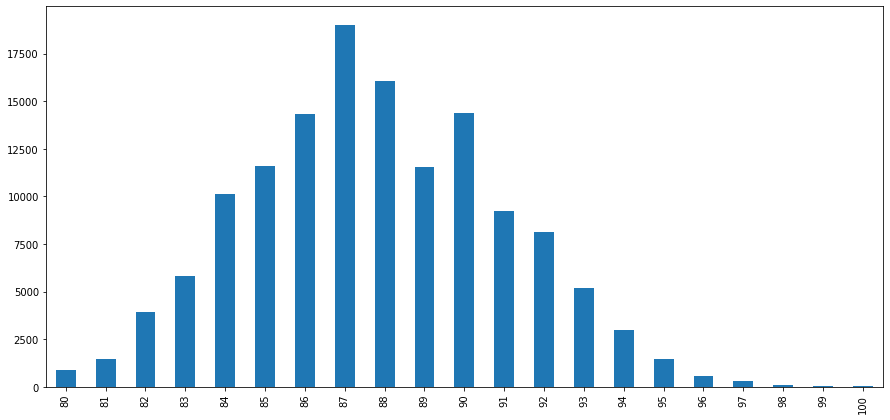

In [91]:
vino3['Puntaje'].value_counts().sort_index().plot.bar()

- Logramos aprecias que la mayor concentracion de los datos en el caso de puntaje esta entre el 87 y el 88, y anteriormente vimos que el promedio del puntaje es 87.88 y la mediana del puntaje es 88. 

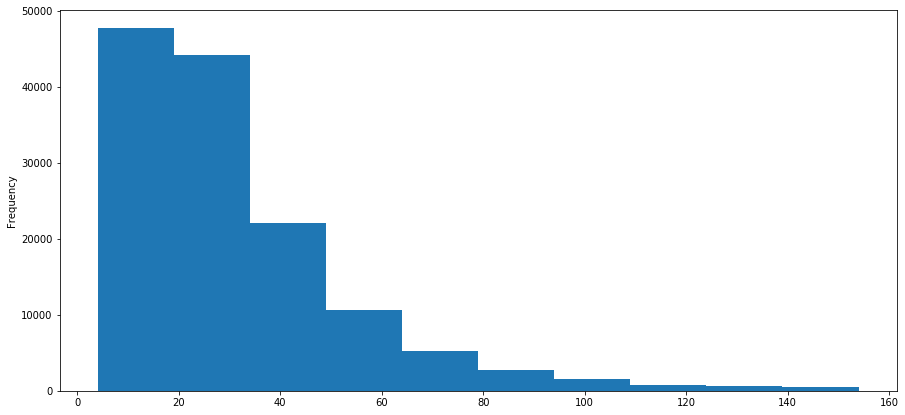

In [92]:
vino3[vino3['Precio'] < 155]['Precio'].plot.hist()

- Comenzamos haciendo que la grafica sea para menos de 155 muestras, para apreciarla de una mejor manera. Claramente vemos que la mayoria de los precios estan concentrados entre el 20 y 30, a su vez nos ayuda mucho saber que la mediana de los precios es 24 y su promedio es 33.13 

## Graficas con seaborn

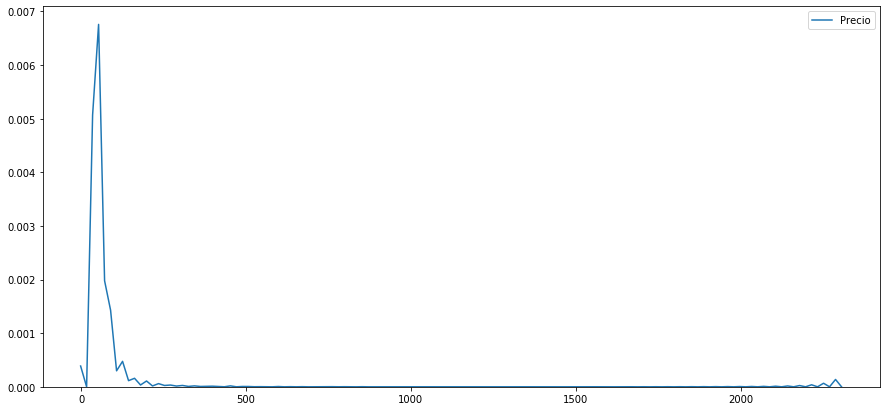

In [93]:
#Importamos 
import seaborn as sns
sns.kdeplot(vino3.query('Precio < 15000').Precio)

- En este caso le puse un tamaño a la grafica de 15000 para apreciar el minimo y el maximo que se tiene de los precios. Como vemos el minimo se aproxima al 0 y el maximo arrebasa los 2000.

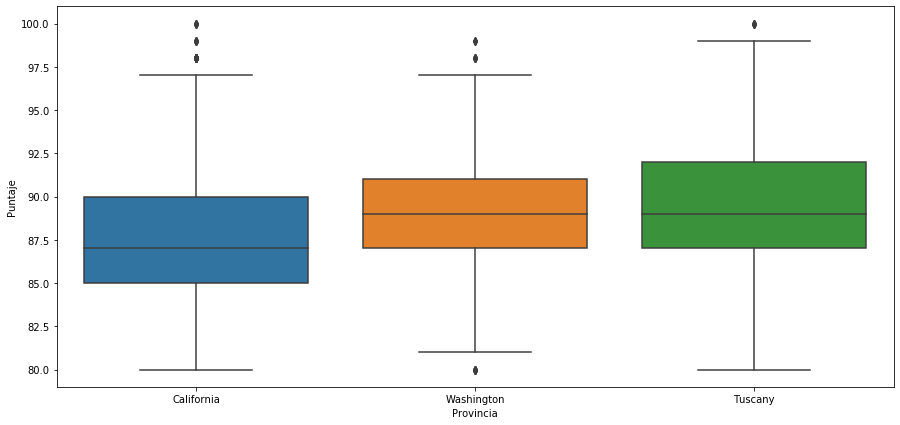

In [94]:
df= vino3[vino3.Provincia.isin(vino3.Provincia.value_counts().head(3).index)]

sns.boxplot(
    x='Provincia',
    y='Puntaje',
    data = df
)

- Se hizo una grafica en la que vemos los datos de california, washington y de tuscany, a simple vista logramos aprecias que el minimo en las 3 provincias oscila entre el 80 y el maximo en el 100. Y que en el caso de washington y tuscany, la mediana esta en el 88 aproximadamente.

## Tareas opcionales

Relacionar al menos 4 graficas con los diferentes tipos de datos con los que se especializa para trabajar.

- Ordinales y Nominales: Variables cualitativas, en su mayoria se pueden utilizar graficas de barras y tambien graficas de pastel.

- Intervalos y Razon: Variables cuantitativas , representa la escala de los valores, se utilizan las marcas de clase para graficar los puntos, que al ser conectados nos dara un poligono.

Realizar una comparacion entre scatter plot y hexplot.

- Un scatter plot simple hace un mapa de cada variable de interes en un espacio bi dimensional, las graficas de scatter plot trabajan mejor con datasets pequeños. A las scatter plot no les va bien cuando los puntos estan en el mismo lugar que otro dentro del mapa. Las graficas de scatter plot trabajan mejor con datasets pequeños, para evitar lo que se conoce como overplotting.

- Un diagrama hexplot agrega puntos en el espacio en hexágonos, y luego colorea esos hexágonos en función de los valores dentro de ellos. Se hace un cluster, por lo que se aprecian mas los valores a comparacion del scatter plot.Para evitar el overplotingse quitan los datos que son muy similares.

# Ejercicio agregado

Seguiremos utilizando la base de datos de los vinos, para comenzar con la practica tenemos que instalar una nueva herramienta llamada nltk.

In [95]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.



En este caso los datos de interes sera la variedad que es el tipo de vino , para que al graficar salgan los nombres de los vinos.

Tomare la variable vino que tenia al principio, borrare las columnas que no vaya a utilizar para este ejercicio y cambiare el nombre de mis columnas principales. Y quitare los valores nulos de las columnas puntaje, precio, pais y variedad
.
A su vez dare una pequeña visualizacion de la tabla.

In [96]:
vinonuevo=vino.drop([ 'description', 'designation','region_1' ,'region_2','province' ,'winery'],axis=1)
vinonuevo2=vinonuevo.rename(columns= {'Unnamed: 0':'Id', 'country':'Pais', 'points':'Puntaje','price':'Precio', 'variety':'Variedad'})
vinonuevo3=vinonuevo2.dropna(subset=['Pais','Puntaje','Precio'],axis=0)
vinonuevo3.head(10)

,Id,Pais,Puntaje,Precio,Variedad
0,0,US,96,235.0,Cabernet Sauvignon
1,1,Spain,96,110.0,Tinta de Toro
2,2,US,96,90.0,Sauvignon Blanc
3,3,US,96,65.0,Pinot Noir
4,4,France,95,66.0,Provence red blend
5,5,Spain,95,73.0,Tinta de Toro
6,6,Spain,95,65.0,Tinta de Toro
7,7,Spain,95,110.0,Tinta de Toro
8,8,US,95,65.0,Pinot Noir
9,9,US,95,60.0,Pinot Noir


Ya una vez modificada la base de datos y eliminados los datos que considero  innecesarios, quiero saber cuales son los datos unicos de variedad.

In [200]:
vinonuevo3['Variedad'].unique()

array(['Cabernet Sauvignon', 'Tinta de Toro', 'Sauvignon Blanc',
       'Pinot Noir', 'Provence red blend', 'Friulano', 'Tannat',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Tempranillo Blend',
       'Syrah', 'Mavrud', 'Sparkling Blend', 'Sangiovese',
       'Rhône-style White Blend', 'Red Blend', 'Mencía', 'Palomino',
       'Petite Sirah', 'Riesling', 'Cabernet Sauvignon-Syrah',
       'Portuguese Red', 'Pinot Gris', 'Nebbiolo', 'Meritage', 'Baga',
       'Glera', 'Malbec-Merlot', 'Merlot-Malbec', 'Ugni Blanc-Colombard',
       'Viognier', 'Cabernet Sauvignon-Cabernet Franc', 'Moscato',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Gamay',
       'Zinfandel', 'Greco', 'Barbera', 'Grenache',
       'Rhône-style Red Blend', 'Albariño', 'Malvasia Bianca',
       'Assyrtiko', 'Malagouzia', 'Carmenère', 'Bordeaux-style Red Blend',
       'Touriga Nacional', 'Agiorgitiko', 'Picpoul', 'Godello',
       'Gewürztraminer', 'Merlot', 'Syrah-Grenache', 'G-S-M', 'Mourvèdre'

Ahora se agregara una nueva carpeta csv para tener enumerados los datos de las filas.

In [146]:
vinonuevo3.to_csv('s-rev.csv',index=False)
read = pd.read_csv("s-rev.csv")
read.head(10)

,Id,Pais,Puntaje,Precio,Variedad
0,0,US,96,235.0,Cabernet Sauvignon
1,1,Spain,96,110.0,Tinta de Toro
2,2,US,96,90.0,Sauvignon Blanc
3,3,US,96,65.0,Pinot Noir
4,4,France,95,66.0,Provence red blend
5,5,Spain,95,73.0,Tinta de Toro
6,6,Spain,95,65.0,Tinta de Toro
7,7,Spain,95,110.0,Tinta de Toro
8,8,US,95,65.0,Pinot Noir
9,9,US,95,60.0,Pinot Noir


Importare varias librerias que seran utilizadas para el grafico.
Tambien tuve que instalar wordcloud para poder utilizarlo en esta practica.
Se crea otro archivo csv para tener guardadas las columnas y poder enumerarlas.

In [195]:
import ssl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import pandas  as pa

if getattr(ssl, '_create_unverified_context', None): 
    ssl._create_default_https_context = ssl._create_unverified_context

read.to_csv('rev-solo.csv',index=False)
pd2 = pa.read_csv('rev-solo.csv',header=None)
pd2.head(10)



,0,1,2,3,4
0,Id,Pais,Puntaje,Precio,Variedad
1,0,US,96,235.0,Cabernet Sauvignon
2,1,Spain,96,110.0,Tinta de Toro
3,2,US,96,90.0,Sauvignon Blanc
4,3,US,96,65.0,Pinot Noir
5,4,France,95,66.0,Provence red blend
6,5,Spain,95,73.0,Tinta de Toro
7,6,Spain,95,65.0,Tinta de Toro
8,7,Spain,95,110.0,Tinta de Toro
9,8,US,95,65.0,Pinot Noir


Ahora se graficara con base a pd2 que es la variable donde tenemos guardada nuestra base de datos final.

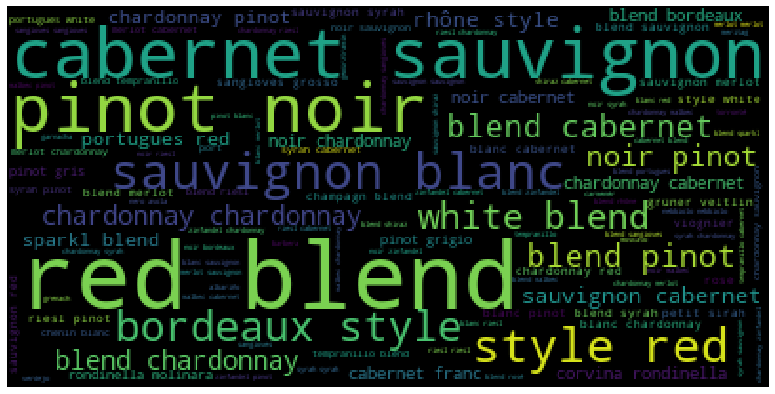

In [199]:
pd2.columns = ['Id','Pais','Puntaje','Precio','Variedad']
n = len(pd2)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')

reemplazos = []
for r in range(n):
    original = pd2.Variedad[r]
    reemplazo = ''
    if original != 'NaN': 
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) 
                                    if p.lower() not in spa]   
    reemplazos.append(' '.join(quedar))
pd2['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()